In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams ['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Reading the data

df = pd.read_csv('/Users/ghudaiya/Downloads/movies.csv')

# Looking at data

df.head()















,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# looking for missing and null data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [4]:
# data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df=df.fillna(0)

In [6]:
#changing data types of columns 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [7]:
# creating a new correct year column
df['correct_year'] = df['year'].astype('str').str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [8]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
# looking at all the data
pd.set_option('display.max_rows',20)

In [10]:
# Dropping Duplicates
df=df.drop_duplicates()

In [11]:
# Budget high correlation
# Company high correlation

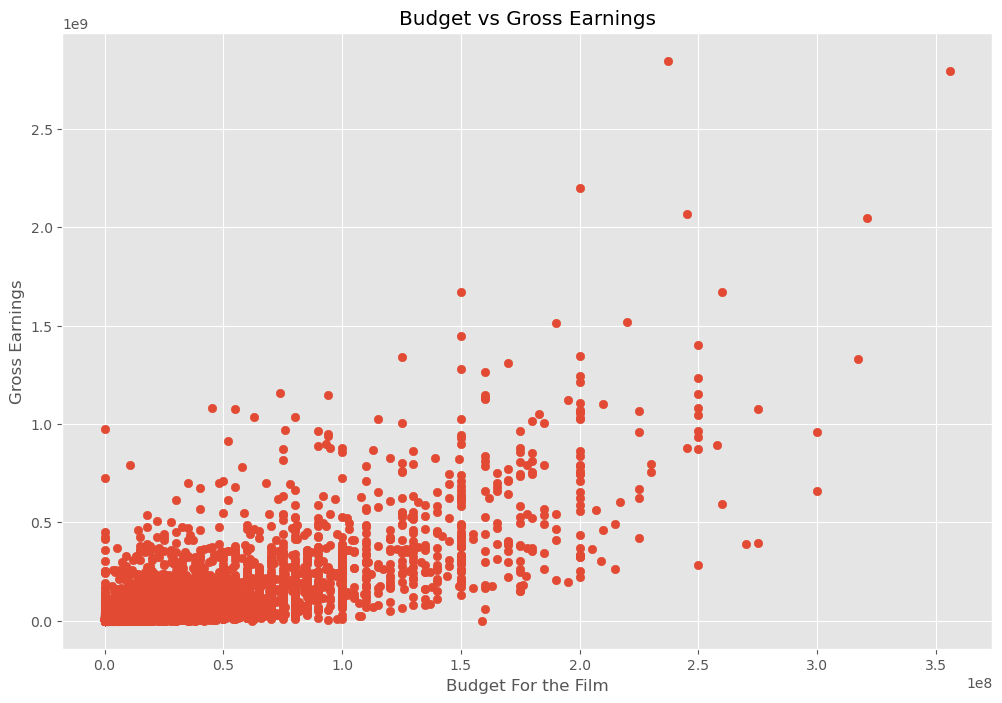

In [12]:
# Scatter Plot with Budget vs Gross Revenue



plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For the Film')
plt.ylabel('Gross Earnings')
plt.show()

In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

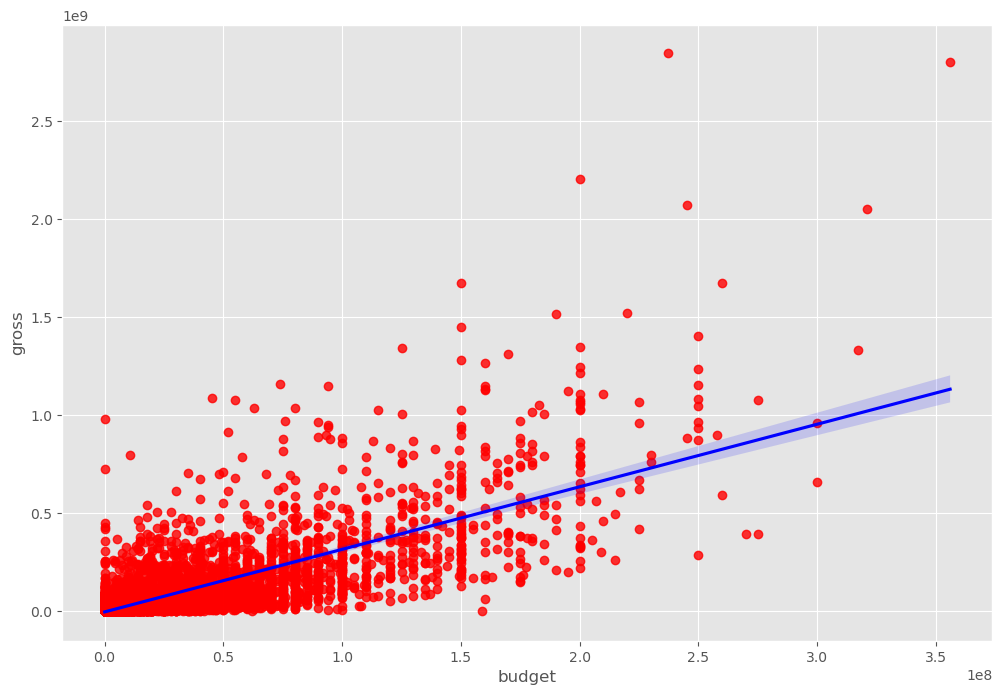

In [14]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [15]:
# Analysing the correlation

df.corr(numeric_only='True', method='pearson')  # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


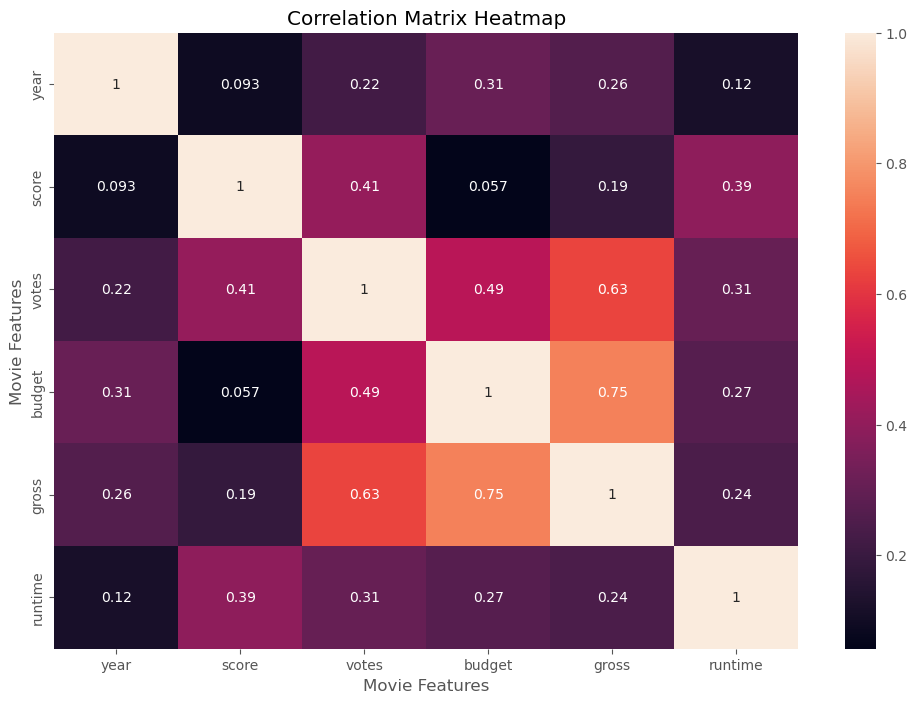

In [16]:
# High correlation between budget and gross

corr_matrix=df.corr(numeric_only='True', method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [18]:
# Categorically Numbering the DataFrame

df_num=df
for col in df_num.columns:
    if(df_num[col].dtype=='object'):
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,29
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,39
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,17
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,35
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,38


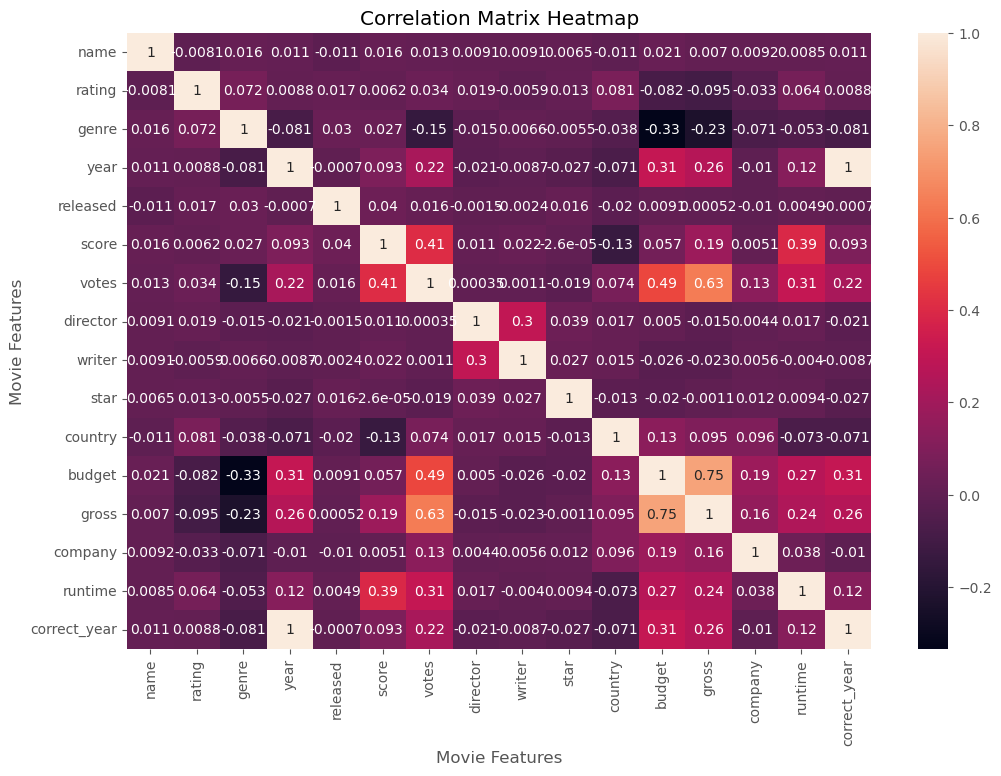

In [20]:
# High correlation between budget and gross

corr_matrix=df_num.corr(numeric_only='True', method='pearson')
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [21]:
df_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.011453
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.008779
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.081261
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,1.000000
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.000695
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.092616
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.222427
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020795
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008656
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027242


In [22]:
# unstacking
corr_mat=df_num.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
correct_year  budget          0.309212
              gross           0.261900
              company        -0.010431
              runtime         0.116358
              correct_year    1.000000
Length: 256, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
genre         gross          -0.234297
gross         genre          -0.234297
genre         votes          -0.145296
                                ...   
gross         gross           1.000000
director      director        1.000000
correct_year  correct_year    1.000000
              year            1.000000
year          correct_year    1.000000
Length: 256, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
name          name            1.000000
                                ...   
gross         gross           1.000000
director      director        1.000000
correct_year  correct_year    1.000000
              year            1.000000
year          correct_year    1.000000
Length: 22, dtype: float64